# ELE435/535 - LAB 9

## Main Parts of the LAB:
## 1) Kernel-PCA on synthetic data
## 2) Kernel-SVM and Kernel-RR on MNIST
## 3) Kernel-Nearest Neighbor on Liver Disorders Dataset
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************


## 1) Kernel-PCA

In this assignment, we will study the effectiveness of kernel PCA.

1-1) Import the given data "LAB9_data_PCA.npy" into numpy. It contains 1000 points, the first 500 of which belongs to class #1 and the rest belongs to class #2. Each row corresponds to one data point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from time import time
import datetime
%matplotlib inline

In [22]:
imported_data =  np.load('LAB9_data_PCA.npy')

In [23]:
imported_data[0,:]

array([-89.30063353, -45.25614115,   4.74182288])

In [24]:
data_class_1 = imported_data[0:500,:]
data_class_2 = imported_data[500:,:]

1-2) Visualize the data in 3D. Use different colors for objects from distinct classes.

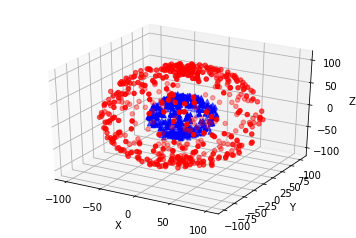

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(data_class_1[:,0], data_class_1[:,1], data_class_1[:,2], c='r', marker='o')
ax.scatter(data_class_2[:,0], data_class_2[:,1], data_class_2[:,2], c='b', marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

1-3) Now perform a normal PCA (i.e. linear PCA) over the data (you may use sklearn's built-in commands for this part). Then project the data onto the span of the first two principal components. Visualize the projected data in 2D. 

In [6]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components).fit(imported_data)
data_pca = (pca.transform(imported_data))

In [7]:
data_pca.shape

(1000, 2)

In [8]:
data_class_1_pca = data_pca[0:500,:]
data_class_2_pca = data_pca[500:,:]


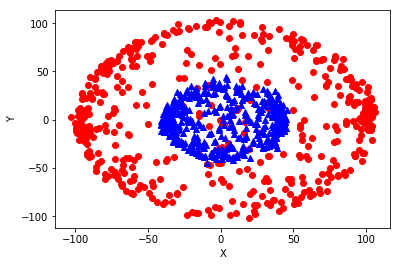

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_class_1_pca[:,0], data_class_1_pca[:,1], c='r', marker='o')
ax.scatter(data_class_2_pca[:,0], data_class_2_pca[:,1], c='b', marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')


plt.show()

1-4) Now, perform kernel PCA with a 4-th order inhomogeneous polynomial kernel. Then, project the data onto the span of first two principal components and visualize the projected data in 2D **(do not use sklearn's built-in commands for this part; follow the steps mentioned in the notes, e.g. find the Gram matrix of the centered data, then use SVD, etc.)**

In [10]:
m = imported_data.shape[0] #  number of data points


In [11]:
# get gram matrix 
kernel_PCA = (1 + np.dot(imported_data,imported_data.T))**4


In [12]:
one_m = np.ones(shape=(m,1))

In [13]:
T1 = np.dot(np.dot(one_m.T,kernel_PCA),one_m)
T2 = np.dot(one_m,one_m.T)
T = T1*T2
K_tilda = kernel_PCA - (1/m)*np.dot(np.dot(one_m,one_m.T),kernel_PCA) - (
    1/m)*np.dot(kernel_PCA, np.dot(one_m,one_m.T)) + (1/(m*m))*T

In [14]:
u, s, vh = np.linalg.svd(K_tilda, full_matrices=False)

In [15]:
# projection can be found by taking the first two rows and multiplying by sqrt of the corresponding eigenvalue
first_component = u[:,0]*np.sqrt(s[0])
second_component = u[:,1]*np.sqrt(s[1])
kernelized_pca = np.zeros(shape = (m,2))
kernelized_pca[:,0] = first_component
kernelized_pca[:,1] = second_component
data_class_1_pca_kernel_4 = kernelized_pca[:500,:]
data_class_2_pca_kernel_4 = kernelized_pca[500:,:]

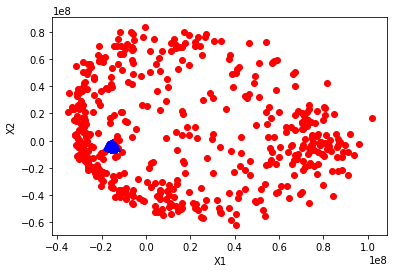

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_class_1_pca_kernel_4[:,0], data_class_1_pca_kernel_4[:,1], c='r', marker='o')
ax.scatter(data_class_2_pca_kernel_4[:,0], data_class_2_pca_kernel_4[:,1], c='b', marker='^')

ax.set_xlabel('X1')
ax.set_ylabel('X2')


plt.show()

1-5) Implement kernel PCA with the RBF kernel **(do not use sklearn's built-in commands; follow the steps in the notes--similar to what you did in the previous part) **
$(k(x,z) = e^{-\gamma \lVert {x-z} \lVert_2^2}, \gamma = 1/2\sigma^2)$.
Choose sigma to be 10, 30, and 100. Also, visualize the projected data onto the span of the first two principal components for each value of sigma.

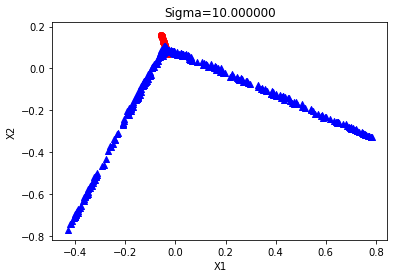

<Figure size 432x288 with 0 Axes>

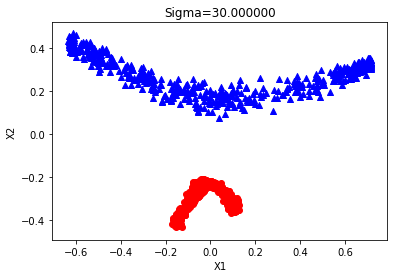

<Figure size 432x288 with 0 Axes>

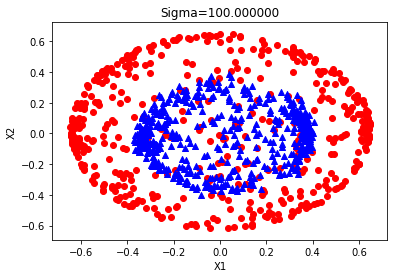

<Figure size 432x288 with 0 Axes>

In [17]:
sigmas = [10, 30, 100]
for sigma in sigmas:
    KernelMatrix = np.zeros(shape = (imported_data.shape[0],imported_data.shape[0]))
    for j in range(0,m):
        for k in range(j,m):
            gamma = 1/(2*sigma*sigma)
            exp_term = -gamma*(np.linalg.norm(imported_data[j] - imported_data[k]))**2
            KernelMatrix[j,k] = np.exp(exp_term)
            KernelMatrix[k,j] = KernelMatrix[j,k]

#         print(j)
    T1 = np.dot(np.dot(one_m.T,KernelMatrix),one_m)
    T2 = np.dot(one_m,one_m.T)
    T = T1*T2
    K_tilda = KernelMatrix - (1/m)*np.dot(np.dot(one_m,one_m.T),KernelMatrix) - (
        1/m)*np.dot(KernelMatrix, np.dot(one_m,one_m.T)) + (1/(m*m))*T
    u, s, vh = np.linalg.svd(K_tilda, full_matrices=False)
    first_component = u[:,0]*np.sqrt(s[0])
    second_component = u[:,1]*np.sqrt(s[1])
    kernelized_pca = np.zeros(shape = (m,2))
    kernelized_pca[:,0] = first_component
    kernelized_pca[:,1] = second_component
    data_class_1_pca_kernel_4 = kernelized_pca[:500,:]
    data_class_2_pca_kernel_4 = kernelized_pca[500:,:]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(data_class_1_pca_kernel_4[:,0], data_class_1_pca_kernel_4[:,1], c='r', marker='o')
    ax.scatter(data_class_2_pca_kernel_4[:,0], data_class_2_pca_kernel_4[:,1], c='b', marker='^')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    plt.title('Sigma=%f' %sigma)


    plt.show()
    plt.clf()

In [21]:
imported_data.shape[0]

1000

In [ ]:
(train_data.T).std()*train_data.shape[0]

1-6) How can you estimate a suitable value of sigma given a dataset? i.e., give a metric to estimate an appropriate value of sigma given some data points.  

#### Sigma could be determined using variance of the data. 
#### sigma = abs(std(class 1 data) - std(class 2 data))
###### In this case this gives a value of 57.8 - 23.16 = 34.64.

In [27]:
imported_data.std()

44.031739326312085

In [25]:
data_class_1.std()

57.79580170219713

In [26]:
data_class_2.std()

23.161071063446993

## 2) Kernel-SVM and Kernel-RR on MNIST

In this part, we will use kernel-SVM and kernel-RR to classify MNIST digits. 


2-1) First, import the subset of MNIST dataset that we were working on in the previous labs. 

In [23]:
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='float64')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='float64')

train_data = train_data/255.0
test_data = test_data/255.0

In [24]:
train_data.shape

(784, 10000)

In [25]:
correct_train_label = [] 
for j in range (0,10):
    correct_train_label += [j]*1000
# correct_train_label = np.asarray(correct_train_label)

In [26]:
# correct_train_label.shape

In [27]:
correct_test_label = [] 
for j in range (0,10):
    correct_test_label += [j]*100
#correct_test_label

2-2) Report the classification accuracy on the testing data using kernel-SVM with a 'linear' kernel. (You may use sklearn's built-in commands for this part. If you use LinearSVC, make sure to change the loss argument to 'hinge', as unlike SVC, LinearSVC uses the squared hinge loss by default.)

In [28]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [29]:
classif = OneVsRestClassifier(SVC(kernel='linear', C=0.01))
classif.fit(train_data.T, correct_train_label)
predicted_labels = classif.predict(test_data.T)

In [30]:
test_err_all = np.count_nonzero(predicted_labels - correct_test_label)
test_acc_all = 1-test_err_all/predicted_labels.shape[0]
test_acc_all

0.887

In [31]:
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(train_data.T, correct_train_label)
predicted_labels = classif.predict(test_data.T)

In [32]:
test_err_all = np.count_nonzero(predicted_labels - correct_test_label)
test_acc_all = 1-test_err_all/predicted_labels.shape[0]
test_acc_all

0.885

#### Classification accuracy is 88.5% with C = 1 and 88.7% with C = .01

2-3) Now, use SVM with 'rbf' kernel. Select three different values of 'gamma' and report how the test accuracy changes. (you may use sklearn's built-in commands for this part) Hint: In order to get a feeling for selecting an appropriate value for gamma, take a look at http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

In [33]:
gammas = [1/(5*(train_data.T).std()*train_data.shape[0]),
         1/(3*(train_data.T).std()*train_data.shape[0]),
         1/(.1*(train_data.T).std()*train_data.shape[0]),
         1/(.05*(train_data.T).std()*train_data.shape[0])]

In [34]:
test_accuracies = []
for g in gammas:
    classif = OneVsRestClassifier(SVC(kernel='rbf', gamma= g)) # gamma = 1 / n_features
    classif.fit(train_data.T, correct_train_label)
    predicted_labels = classif.predict(test_data.T)
    test_err_all = np.count_nonzero(predicted_labels - correct_test_label)
    test_acc_all = 1-test_err_all/predicted_labels.shape[0]
    test_accuracies.append(test_acc_all)

In [36]:
test_accuracies

[0.874, 0.888, 0.958, 0.9390000000000001]

In [37]:
gammas

[0.0008239729934406114,
 0.001373288322401019,
 0.04119864967203056,
 0.08239729934406112]

Text(0.5,1,'Test Accuracy v/s gamma')

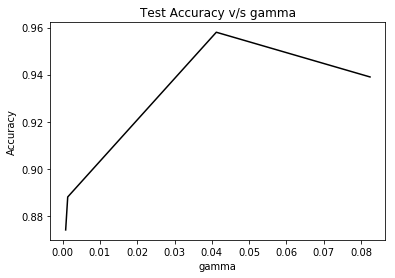

In [35]:
plt.plot(gammas, test_accuracies, 'k-')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('Test Accuracy v/s gamma')

##### Test accuracy first increases and then decreases with gamma

2-4) Repeat 2-3 with the Kernel Ridge Classifier. You may use sklearn's KernelRidge, which is normally used for regression. To adopt it for classification, you can perform a binary encoding of the labels using LabeLBinarizer. Check https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html.

In [44]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [45]:
y_train_binary = lb.fit_transform(correct_train_label)
y_test_binary = lb.fit_transform(correct_test_label)

In [46]:
gammas = [1/(5*(train_data.T).std()*train_data.shape[0]),
         1/(3*(train_data.T).std()*train_data.shape[0]),
         1/(.1*(train_data.T).std()*train_data.shape[0]),
         1/(.05*(train_data.T).std()*train_data.shape[0])]

In [47]:
test_accuracies = []
for g in gammas:
    classif =  KernelRidge(alpha=1.0, kernel='rbf', gamma=g ) # gamma = 1 / n_features
    classif.fit(train_data.T, y_train_binary)
    predicted_labels = classif.predict(test_data.T)
    predicted_labels_transformed = lb.inverse_transform(predicted_labels)
    test_err_all = np.count_nonzero(predicted_labels_transformed - correct_test_label)
    test_acc_all = 1-test_err_all/predicted_labels_transformed.shape[0]
    test_accuracies.append(test_acc_all)

In [49]:
test_accuracies

[0.853, 0.877, 0.954, 0.9390000000000001]

Text(0.5,1,'Test Accuracy v/s gamma')

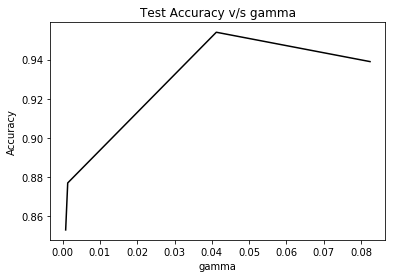

In [48]:
plt.plot(gammas, test_accuracies, 'k-')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('Test Accuracy v/s gamma')

##### once again, test accuracy first increases and then decreases with gamma

# 3) Kernel Nearest Neighbor Classifier on Liver Disorders Data Set

In this part, we will be working with BUPA Liver Disorder database from BUPA Medical Research Ltd. (http://archive.ics.uci.edu/ml/datasets/Liver+Disorders). It contains data from 345 male individuals. We have selected the first 245 samples to form the training data and the rest as testing data. 

The first 5 features are results from blood tests. They are sensitive to liver disorders that may arise from excessive alcohol consumption. The sixth feature is the number of drinks per day. The last column specifies whether someone has the disorder or not.

In [38]:
import pandas as pd

In [39]:
data_liver = pd.read_csv('Liver_Dataset2.txt', sep='\t', lineterminator='\n',header=None)

In [40]:
data_liver_numpy_matrix = data_liver.as_matrix()

C:\Users\preri\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [41]:
data_liver_numpy_matrix[0,:]

array([85., 92., 45., 27., 31.,  0.,  1.])

In [42]:
data_liver

,0,1,2,3,4,5,6
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
5,98,55,13,17,17,0.0,2
6,88,62,20,17,9,0.5,1
7,88,67,21,11,11,0.5,1
8,92,54,22,20,7,0.5,1
9,90,60,25,19,5,0.5,1


3-1) Implement 1-nearest neighbor classifier and report the testing accuracy. You may use sklearn's built-in commands for this part.

In [43]:
X_train = data_liver_numpy_matrix[0:245,0:-1]
Y_train = data_liver_numpy_matrix[0:245,-1]
X_test = data_liver_numpy_matrix[245:,0:-1]
Y_test = data_liver_numpy_matrix[245:,-1]

In [44]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler().fit(X_train)
X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

In [45]:
from sklearn.neighbors import NearestNeighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
classif =  KNeighborsClassifier(n_neighbors=1) # gamma = 1 / n_features
classif.fit(X_train_std, Y_train)
predicted_score = classif.score(X_test_std,Y_test)
predicted_score

0.62

##### Test accuracy is 0.62

3-2) Implement kernel-nearest neighbor classifier using 3-th order inhomogeneous polynomial kernel. Report the testing accuracy. **Do not use sklearn for this part. Follow the steps mentioned in the notes (i.e. through forming the Gram matrix).** How much test accuracy improvement do we achieve using the polynomial kernel?

In [48]:
KK = (1 + np.dot(X_train,X_train.T))**3
KK_diag = np.diag(KK)

In [50]:
no_test_cases = X_test.shape[0]
prediction_3rd_order = []
for j in range(0,X_test.shape[0]):
    prod1 = 2*(1+np.dot(X_train, X_test[j,:].T))**3 - KK_diag
    pred = np.argmax(prod1)
    prediction_3rd_order.append(pred)
labels_predicted = Y_train[prediction_3rd_order]
test_err_all = np.count_nonzero((labels_predicted - Y_test))
test_acc_all = 1-test_err_all/labels_predicted.shape[0]
test_acc_all

0.63

#### Test accuracy is 0.63. Accuracy improves by 1%
